<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

#extra code - the  exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3],[-1.5, 2.3],[-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers= blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

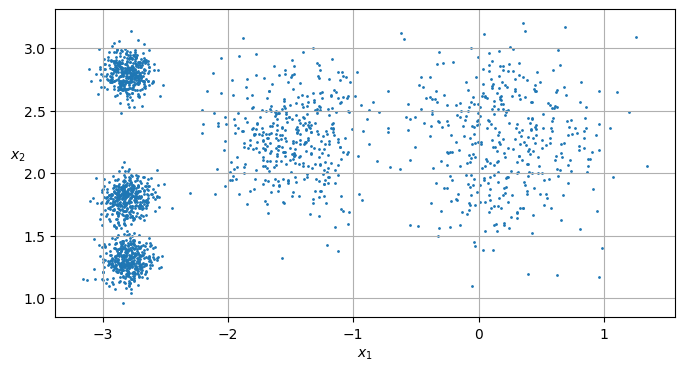

In [6]:
import matplotlib.pyplot as plt
def plot_clusters(X,y=None):
  plt.scatter(X[:, 0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [7]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [9]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [8]:
y_pred is kmeans.labels_

True

In [10]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [13]:
import numpy as np

X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

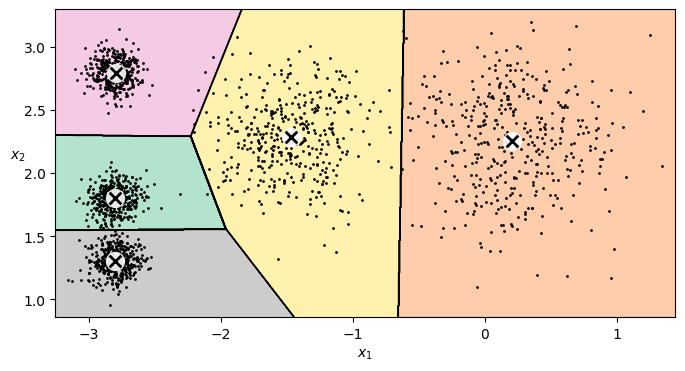

In [14]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


In [15]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

#The k-means

In [16]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

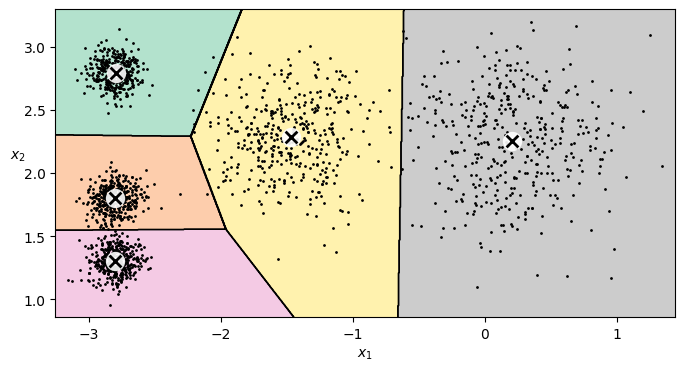

In [17]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

In [18]:
kmeans.inertia_

211.5985372581684

In [20]:
kmeans.score(X)

-211.59853725816836

In [27]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                          random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

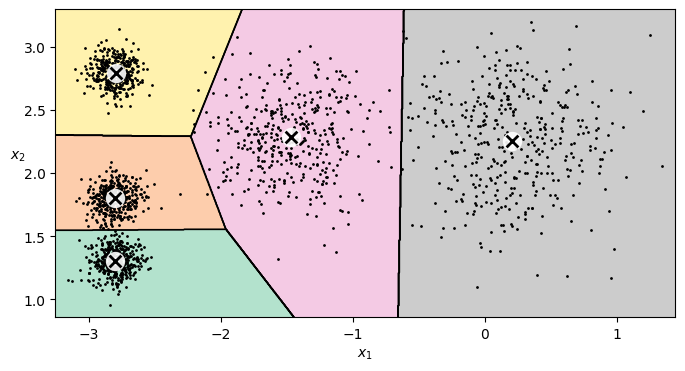

In [28]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits,X)
plt.show()

In [29]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

#Mini-batch k-means

In [30]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [31]:
minibatch_kmeans.inertia_

211.65239850433215

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

#plot_clusterer_comparions(kmeans_k3, kmeans_k8)

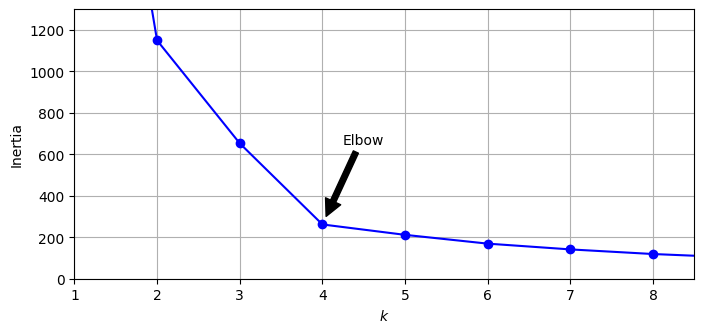

In [34]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
 for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1,8.5,0,1300])
plt.grid()
plt.show()
